In [21]:
import numpy as np
import simtk.unit as unit
import matplotlib.pyplot as plt

# Integradores

Consideremos un sistema de N partículas cuyo Hamiltoniano se expresa como:
    
\begin{equation}
H=T+V=\frac{1}{2}\sum_{i=1}^{N} m_{i}\vec{v}_{i}^{2}+\sum_{i=1}^{N}\sum_{j>i}^{N}V(\vec{r}_{ij})
\end{equation}

No es necesario desarrollar la mecánica Hamiltonian, podemos avanzar que las ecuaciones del movimiento de las partículas compatibles con la conservación de la energía (valor del Hamiltoniano constante) son las mismas que se expresan como la segunda ley de Newton:

\begin{equation}
m_{i}\vec{a}_{i}=\vec{F}_{i}=-\nabla_{\vec{r}_{i}} H = -\nabla_{\vec{r}_{i}} \sum_{j\neq i}V(\vec{r}_{ij})
\end{equation}

Donde el gradiente ($\nabla_{\vec{r}_{i}}$) no es otra cosa que el vector construido por las derivadas parciales en cada coordenada espacial:

\begin{equation}
\nabla_{\vec{r}_{i}} O(\vec{r}_{i}) = \frac{\delta}{\delta x_{i}} O(\vec{r}_{i}) \hat{x} +
\frac{\delta}{\delta y_{i}} O(\vec{r}_{i}) \hat{y} + \frac{\delta}{\delta z_{i}} O(\vec{r}_{i}) \hat{z}
\end{equation}

Nótese que para acercar la notación a un público con formación científica general, estamos empleando las variables aceleración y velocidad:

\begin{equation}
\vec{v}_{i}=\frac{d\vec{r}_i}{dt}, \quad\quad \vec{a}_{i}=\frac{d\vec{v}_i}{dt}
\end{equation}

Si se consultan otros textos más especializados se verá que la notación usada suele ser en términos del momento ($\vec{p}$) -en lugar de la velocidad- y la posición ($\vec{r}$), y las derivadas temporales suelen expresarse con un punto sobre el simbolo correspondiente ($\dot{\vec{p}}$ y $\dot{\vec{r}}$).

Ahora, ¿cómo obtenemos la trayectoria de las partículas de manera numérica? Para los sistemas con los que vamos a trabajar, integrar matemáticamente las ecuaciones de movimiento para obtener una expresión exacta de la posición de las partículas en función del tiempo no es posible. Cómo veremos sólo para unos pocos ejemplos, como el caso de una molécula diatómica aislada, podemos obtener esta solución. Así que para conocer la posición de las partículas en el instante posterior ($t+\Delta t$) a uno dado ($t$), podemos recurrir a la expansión de Taylor de toda función matemática (cuya solución es exacta cuando se incluyen los infinitos sumandos):

\begin{equation}
\vec{r}(t+\Delta t) = \vec{r}(t) + 
\frac{d\vec{r}(t)}{dt}\Delta t +
\frac{1}{2!}\frac{d^{2}\vec{r}(t)}{dt^{2}}\Delta t^{2} +
\frac{1}{3!}\frac{d^{3}\vec{r}(t)}{dt^{3}}\Delta t^{3} + ... +
\frac{1}{n!}\frac{d^{n}\vec{r}(t)}{dt^{n}}\Delta t^{n} + ...
\end{equation}

De tal manera que el problema a resolver se convierte lo abordamos en una estrategia de elementos finitos en la que siempre necesitaremos unas condiciones iniciales y un incremento de tiempo para aproximarnos a la posición que tendrá una partícula en un tiempo determinado (tras un número determinado de incrementos). Y decimos aproximación porque la ecuación anterior sólo es exacta cuando se incluyen los infinitos sumandos y el incremento temporal es infinitamente pequeño ($\Delta t \to 0$). En un caso práctico **siempre** habrá entonces un error o desviación de la limitación de no poder trabajar en la práctica con infinitos sumandos e incrementos temporales infinitesimales.

Además, la computadora no puede trabajar con un número infinito de decimales. Existe una limitante en la precisión. Habitualmente, trabajamos con números de tipo 'float' o de precisión sencilla (single precision) donde un número real se codifica como 32 bits. Este tipo de variables numéricas tienen una precisión (para números cuya parte entera es cero) de $\approx 7$ decimales. Si queremos que la computadora trabaje con números de una mayor precisión, podemos trabajar con variables de tipo doble precisión (double precision) codificados en 64 bits. De esta manera las operaciones algebráicas se realizan con una precisión de $\approx 15$ decimales.

Resumiendo, estas son las fuentes de imprecisión o de error cuando intentamos determinar la evolución de las posiciones del sistema en el tiempo mediante un abordaje de elementos finitos:
- Incremento de tiempo no infinitesimal
- Número limitado de sumandos en la expansión de Taylor de las posiciones
- Límite en el número de decimales de los números reales manejados por la computadora

La conservación de la energía y del momento sucede si no hay fuerzas externas más allá que las del sistema. Cuando el sistema define todo el universo, no hay nada más.

Pero el paso de tiempo debe ser lo suficientemente largo como para economizar, sin arriesgar la fiabilidad, el coste computacional.

In [ ]:
Hay herramientas para calcular la robustez o el error de un integrador [Haile1992].

Un integrador, para ser correcto, debe [Allen2017Computer_91, Haile1992Molecular_90]:
- Conservar la energía y el momento
- Ser reversible en tiempo
- Reproducir de la manera más precisa posible la trayectoria clásica

Además, para ser eficiente en una simulación, debe [Allen2017Computer_91, Haile1992Molecular_90]:
- Ser rápido y requerir poca memoria
- Permitir un paso de tiempo suficientemente largo
- Ser simple en su implementación como algoritmo

Cuanto más largo el paso de tiempo, mas grande la imprecisión

## Integración con expansión de Taylor de segundo orden

La expansión de Taylor es la base de muchos de los integradores de ecuaciones diferenciales más clásicos, como por ejemplo el Runge-Kutta. Hagamos uso de la expansión, tal cual es, para integrar numéricamente la trayectoria de un sistema cuya forma analítica puede ser resuelta:


Y podemos calcular la energía cinética, potencial y total, también en función del tiempo:

In [37]:
kinetic_energy = 0.5*mass*vxs**2
potential_energy = 0.5*k*xs**2
total_energy = kinetic_energy + potential_energy

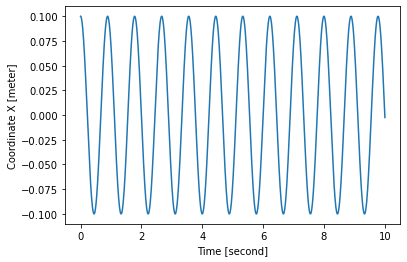

In [34]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(times, xs)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

plt.plot(times, xs)
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Coordinate X [{}]'.format(positions.unit))
plt.show()

In [1]:
import simtk.unit as unit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class spring_and_mass():
    
    def __init__(self, mass, k):
        self.mass = mass
        self.k = k
    
    def force(self, position):
        output = -self.k*position
        return output.in_units_of(unit.newton)
    
    def potential_energy(self, position):
        output = 0.5*self.k*(position[0]**2+position[1]**2+position[2]**2)
        return output.in_units_of(unit.joules)
        
    def kinetic_energy(self, velocity):
        output = 0.5*self.mass*(velocity[0]**2+velocity[1]**2+velocity[2]**2)
        return output.in_units_of(unit.joules)

In [3]:
system = spring_and_mass(mass=0.2*unit.kilogram, k=10.0*unit.joules/unit.meters**2)

In [4]:
system.force(np.array([1.0, 0.0, 0.0]) * unit.meters)

Quantity(value=array([-10.,  -0.,  -0.]), unit=newton)

In [5]:
system.potential_energy(np.array([1.0, 0.0, 0.0]) * unit.meters)

Quantity(value=5.0, unit=joule)

In [6]:
system.kinetic_energy(np.array([1.0, 0.0, 0.0]) * unit.meters/unit.seconds)

Quantity(value=0.1, unit=joule)

In [7]:
initial_conditions = {
    'position' : np.array([1.0, 0.0, 0.0]) * unit.meters,
    'velocity' : np.array([0.0, 0.0, 0.0]) * unit.meters/unit.seconds,
    'time' : 0.0 * unit.seconds
}

In [8]:
total_time = 10.0 * unit.seconds
n_steps = 2000
integration_timestep = total_time/n_steps

In [9]:
def integrator(system, initial_conditions, integration_timestep, n_steps):
    
    time_i = initial_conditions['time']
    position_i = initial_conditions['position']
    velocity_i = initial_conditions['velocity']
    force_i = system.force(position_i)
    kinetic_energy_i = system.kinetic_energy(velocity_i)
    potential_energy_i = system.potential_energy(position_i)
    
    positions = np.empty([n_steps, 3]) * unit.meters
    velocities = np.empty([n_steps, 3]) * unit.meters/unit.seconds
    kinetic_energy = np.empty([n_steps]) * unit.joules
    potential_energy = np.empty([n_steps]) * unit.joules
    times = np.empty([n_steps]) * unit.seconds
    
    positions[0,:] = position_i
    velocities[0,:] = velocity_i
    times[0] = time_i
    kinetic_energy[0] = kinetic_energy_i
    potential_energy[0] = potential_energy_i

    for step_index in range(1,n_steps):
    
        position_f = position_i + velocity_i * integration_timestep + \
                     0.5 * (force_i/system.mass) * integration_timestep**2
        velocity_f = velocity_i + force_i/system.mass * integration_timestep
        force_f = system.force(position_f)
        time_f = time_i + integration_timestep
    
        positions[step_index,:] = position_f
        velocities[step_index,:] = velocity_f
        times[step_index] = time_f
        kinetic_energy[step_index] = system.kinetic_energy(velocity_f)
        potential_energy[step_index] = system.potential_energy(position_f)

        position_i = position_f
        velocity_i = velocity_f
        time_i = time_f
        force_i = force_f
        
    return positions, velocities, times, kinetic_energy, potential_energy

In [10]:
positions, velocities, times, kinetic_energy, potential_energy = integrator(system, 
                                            initial_conditions, integration_timestep, n_steps)

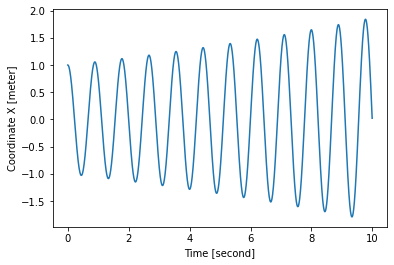

In [11]:
plt.plot(times, positions[:,0])
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Coordinate X [{}]'.format(positions.unit))

plt.show()

In [12]:
total_energy = potential_energy + kinetic_energy

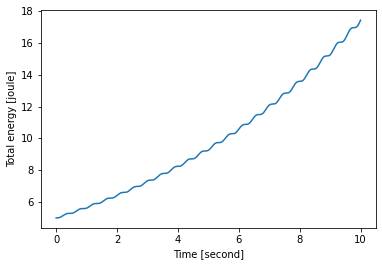

In [13]:
plt.plot(times, total_energy[:])
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Total energy [{}]'.format(total_energy.unit))

plt.show()

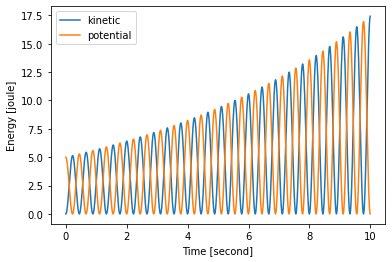

In [14]:
plt.plot(times, kinetic_energy[:], label='kinetic')
plt.plot(times, potential_energy[:], label='potential')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Energy [{}]'.format(total_energy.unit))
plt.legend()
plt.show()

El sistema va ganando energía!!! De donde?

Es reversible?

In [15]:
initial_conditions = {
    'position' : positions[-1],
    'velocity' : velocities[-1],
    'time' : times[-1]
}

In [16]:
positions_rev, velocities_rev, times_rev, kinetic_energy_rev, potential_energy_rev = \
integrator(system, initial_conditions, -integration_timestep, n_steps)

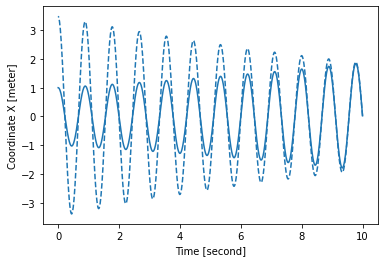

In [17]:
plt.plot(times, positions[:,0])
plt.plot(times_rev, positions_rev[:,0], '--', color='#1f77b4')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Coordinate X [{}]'.format(positions.unit))

plt.show()

In [18]:
total_energy_rev = potential_energy_rev + kinetic_energy_rev

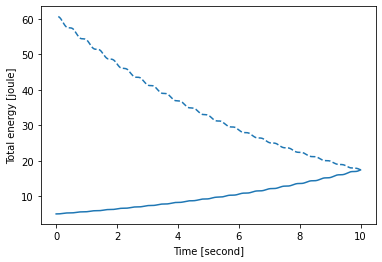

In [19]:
plt.plot(times, total_energy[:])
plt.plot(times_rev, total_energy_rev[:], '--', color='#1f77b4')
plt.xlabel('Time [{}]'.format(times.unit))
plt.ylabel('Total energy [{}]'.format(total_energy.unit))

plt.show()

Para hacer:
    - Prueba a disminuir e incrementar el paso de integración (o el número de pasos para simular el mismo tiempo total)
    - Prueba a comenzar dos trayectorias muy prácticas y comprueba la divergencia debida al error numérico y sistemático (en este caso porque el integrador es malo). Exponentes de Liapunov.